# Walmart Sales Analysis and Optimization

## 🗂️ Project Overview
The company holds valuable retail sales data that includes transaction details such as branch location, product type, customer type, payment method, and purchase time. This data serves as an essential asset to understand customer behavior, operational efficiency, and opportunities for revenue growth. Stakeholders aim to analyze how these factors influence business performance and identify strategies to optimize sales.



## 🎯 Objectives
- Analyze sales patterns: Identify sales trends based on products, branches, customer types, and payment methods.
- Evaluate branch performance: Compare the performance of each branch to determine the top-performing and underperforming branches.
- Analyze customer satisfaction: Use customer ratings to assess their experience and identify factors influencing satisfaction.
- Provide strategic insights: Deliver data-driven recommendations to boost sales and operational efficiency.


## 📊 Data Description
### An interactive dashboard in Power BI showing:
- Total sales per branch and product category.
- Monthly sales trends over time.
- Payment method analysis.

### Distribution of customer ratings.
- An analytical report in Google Colab using Python, including:
- Descriptive statistics of the data.
- Visualizations of sales trends.
- Correlation analysis between variables (e.g., ratings and gross income).
- Key insights and actionable recommendations.

## 🌟 Success Criteria
- The dashboard is easy for stakeholders to understand.
- The Python analysis provides actionable insights.
- Strategic recommendations are data-driven and aligned with business objectives.


# Business Insight Overview

# Recommendations & Next Steps

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/Project4/WalmartSalesData.csv.csv"
df = pd.read_csv(file_path)
df.shape

(1000, 17)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


# Assesing the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<Axes: >

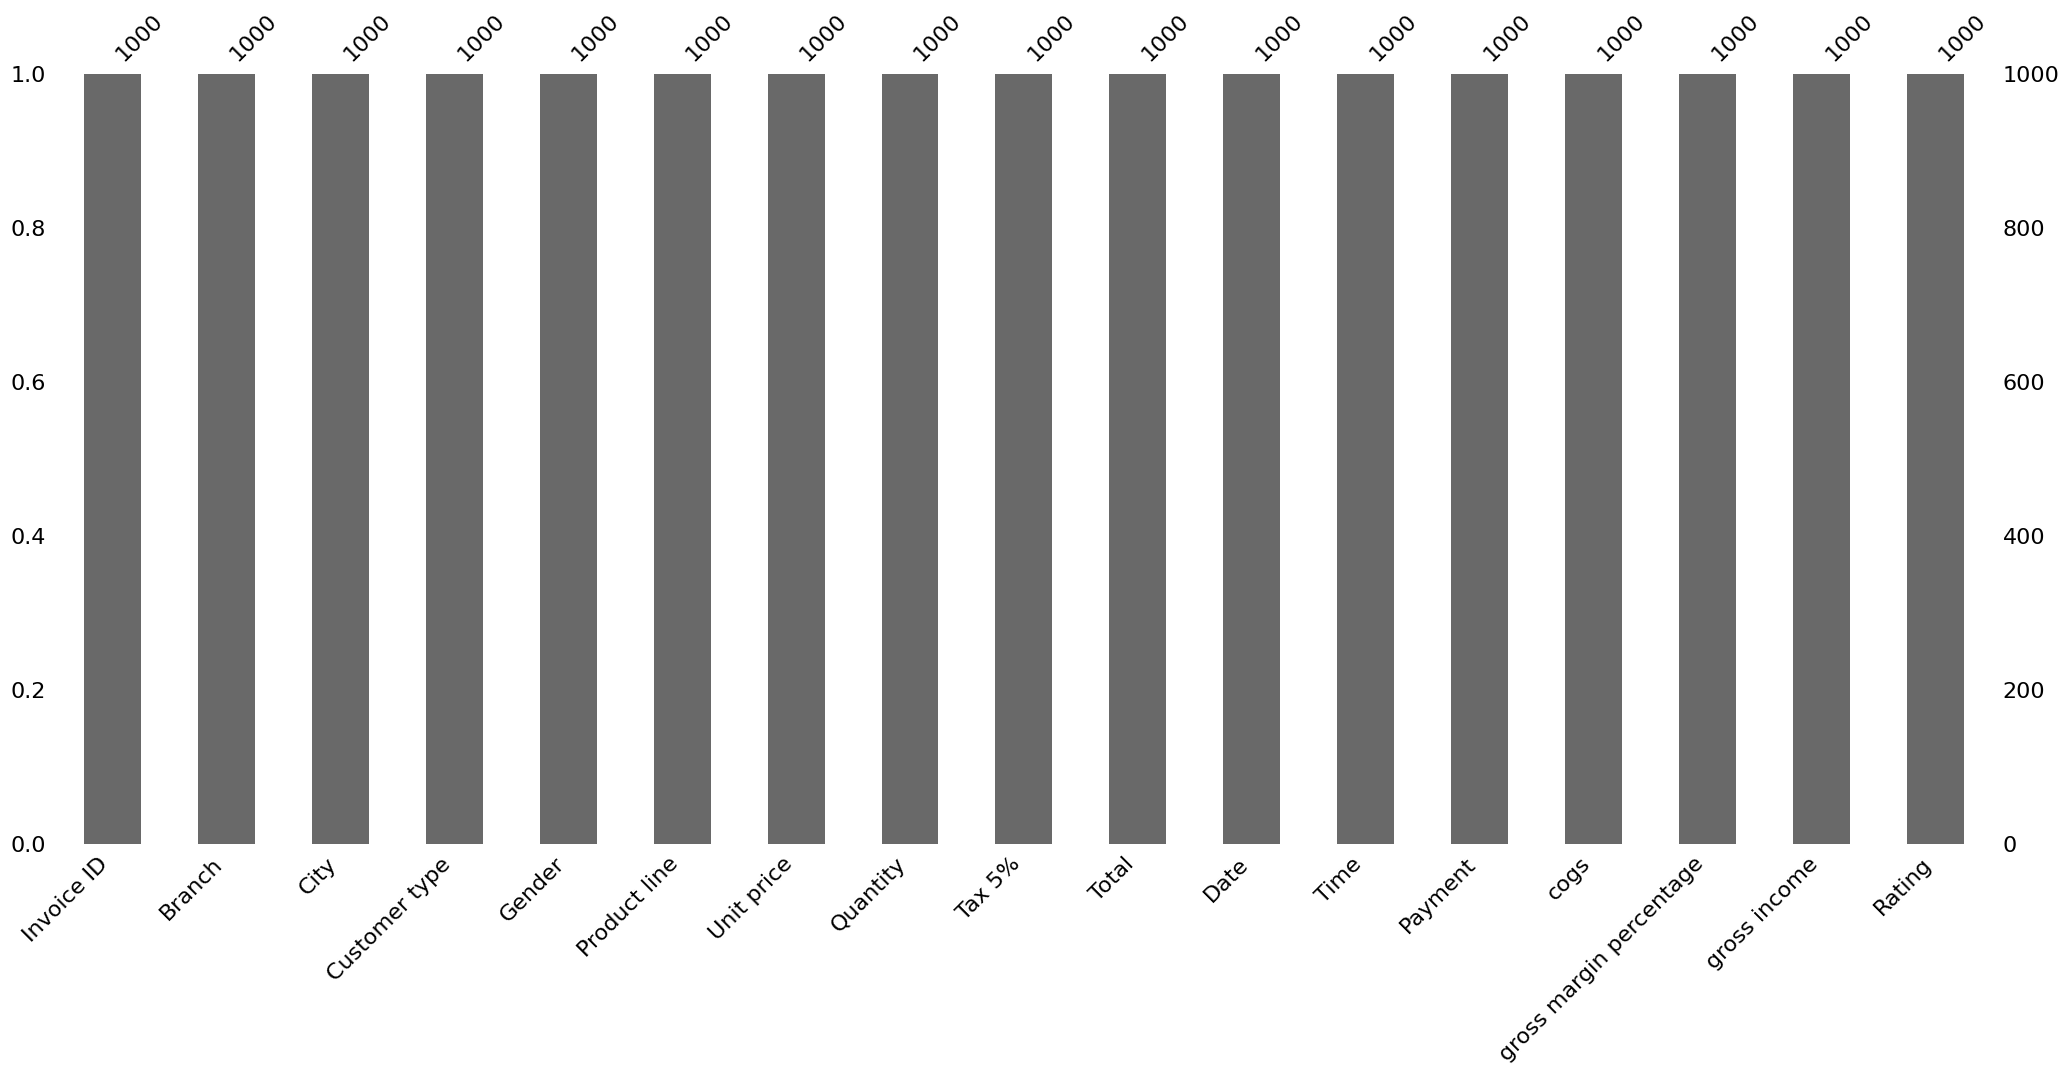

In [6]:
msno.bar(df)

In [7]:
pd.isnull(df).sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis

## Analyze sales patterns: Identify sales trends based on products, branches, customer types, and payment methods.

In [39]:
# Total sales per product line
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

print(product_sales)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


In [41]:
# Total sales per customer type
customer_sales = df.groupby('Customer type')['Total'].sum()

print(customer_sales)


Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


In [43]:
# Total sales per payment method
payment_sales = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)

print(payment_sales)

Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


In [46]:
# Extract month from the date
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Total sales per month
monthly_sales = df.groupby('Month')['Total'].sum()

print(monthly_sales)

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


In [20]:
df.groupby('Gender')['Customer type'].value_counts()

Gender  Customer type
Female  Member           261
        Normal           240
Male    Normal           259
        Member           240
Name: count, dtype: int64

In [27]:
city_transaction_count = df.groupby('City')['Invoice ID'].nunique().sort_values(ascending=False)

print(city_transaction_count)

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: Invoice ID, dtype: int64


In [29]:
city_analysis = df.groupby('City').agg(
    Total_Sales=('Total', 'sum'),
    Transaction_Count=('Invoice ID', 'nunique')
).sort_values(by='Total_Sales', ascending=False)

print(city_analysis)

           Total_Sales  Transaction_Count
City                                     
Naypyitaw  110568.7065                328
Yangon     106200.3705                340
Mandalay   106197.6720                332


## Evaluate branch performance: Compare the performance of each branch to determine the top-performing and underperforming branches.

In [31]:
# Total sales per branch
branch_sales = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Average gross income per branch
branch_income = df.groupby('Branch')['gross income'].mean().sort_values(ascending=False)

# Combine results into a DataFrame for better analysis
branch_performance = pd.DataFrame({
    'Total Sales': branch_sales,
    'Avg Gross Income': branch_income
}).sort_values(by='Total Sales', ascending=False)

print(branch_performance)

        Total Sales  Avg Gross Income
Branch                               
C       110568.7065         16.052367
A       106200.3705         14.874001
B       106197.6720         15.232024


## Analyze customer satisfaction: Use customer ratings to assess their experience and identify factors influencing satisfaction.

In [34]:
# Average rating per branch
branch_ratings = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)

print(branch_ratings)


Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64


In [35]:
# Correlation between Rating and other numerical variables
correlation_matrix = df[['Rating', 'Total', 'gross income']].corr()
print(correlation_matrix)

                Rating     Total  gross income
Rating        1.000000 -0.036442     -0.036442
Total        -0.036442  1.000000      1.000000
gross income -0.036442  1.000000      1.000000


In [37]:
# Average rating per product line
product_ratings = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

print(product_ratings)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


# Visualization & Explanatory Analysis

### Sales patern

<ipython-input-10-824aa3dbb956>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


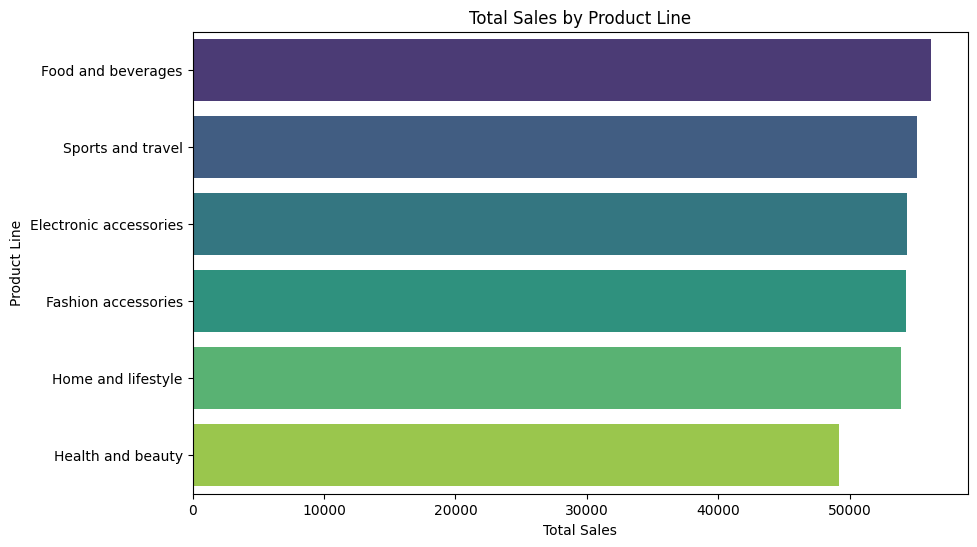

In [ ]:
# Total sales by product line
sales_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

<ipython-input-42-d74998cf22a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index, y=customer_sales.values, palette='pastel')


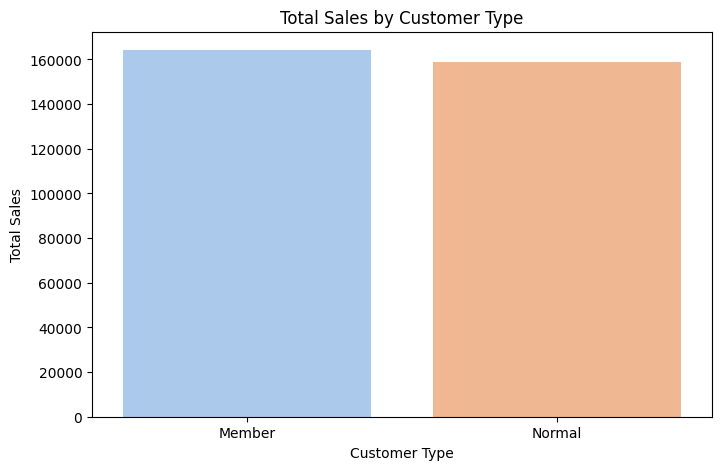

In [42]:
# Visualize customer type sales
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_sales.index, y=customer_sales.values, palette='pastel')
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.show()

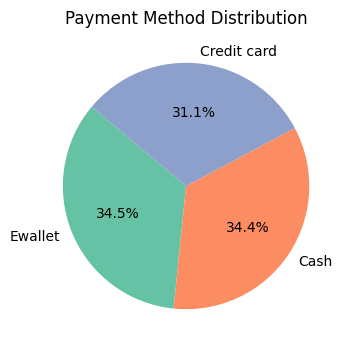

In [45]:
# Payment method distribution
payment_distribution = df['Payment'].value_counts()
plt.figure(figsize=(6, 4))
payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

### Branch Performance

<ipython-input-32-08f1721f4c3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_performance.index, y=branch_performance['Total Sales'], palette='viridis')


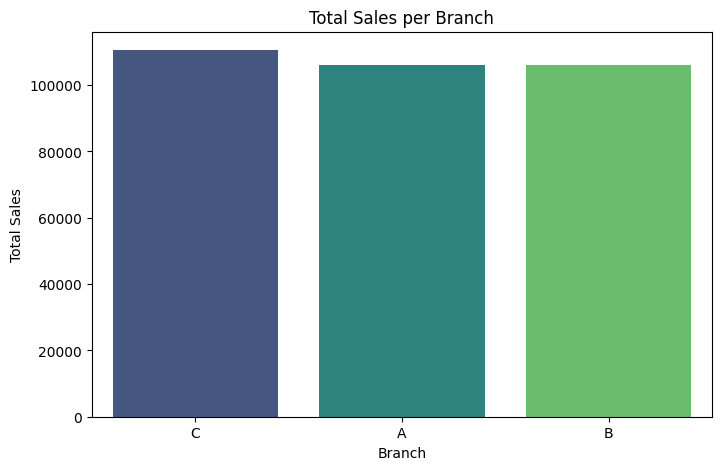

In [32]:
# Plot total sales per branch
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_performance.index, y=branch_performance['Total Sales'], palette='viridis')
plt.title('Total Sales per Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.show()


<ipython-input-33-56734b143652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_performance.index, y=branch_performance['Avg Gross Income'], palette='magma')


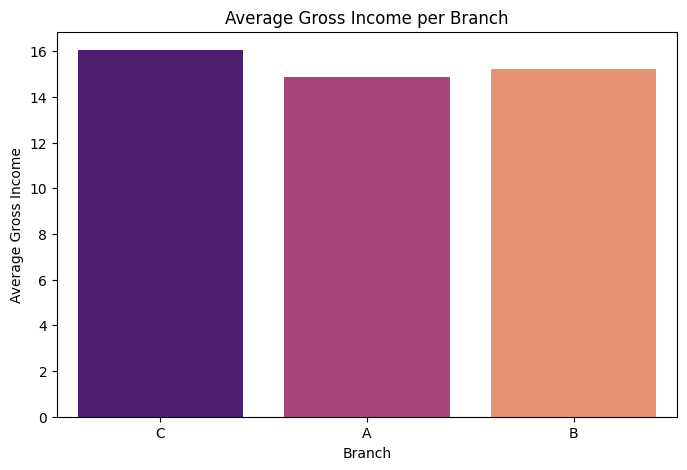

In [33]:
# Plot average gross income per branch
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_performance.index, y=branch_performance['Avg Gross Income'], palette='magma')
plt.title('Average Gross Income per Branch')
plt.ylabel('Average Gross Income')
plt.xlabel('Branch')
plt.show()

## Analyze customer satisfaction

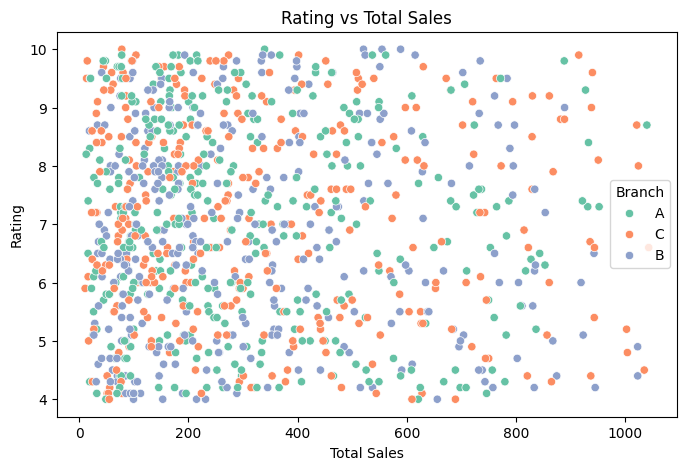

In [36]:
# Scatter plot of Rating vs Total Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total', y='Rating', hue='Branch', palette='Set2')
plt.title('Rating vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.legend(title='Branch')
plt.show()

<ipython-input-38-679f407f8a28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_ratings.index, y=product_ratings.values, palette='coolwarm')


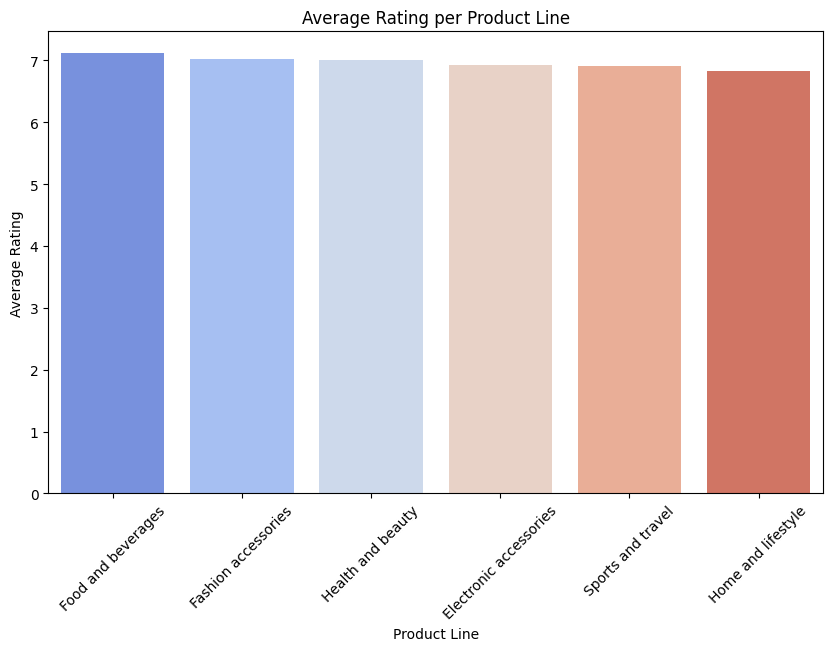

In [38]:
# Visualizing average ratings per product line
plt.figure(figsize=(10, 6))
sns.barplot(x=product_ratings.index, y=product_ratings.values, palette='coolwarm')
plt.title('Average Rating per Product Line')
plt.ylabel('Average Rating')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.show()